In [12]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [51]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,34543,None,None,85802.191759
2020-06-13,34544,None,None,79715.415366
2020-06-14,34545,None,None,74062.045433
2020-06-15,34546,None,None,68736.342275
2020-06-16,34547,None,None,63992.924193
...,...,...,...,...
2021-02-24,34800,None,None,155408.441627
2021-02-25,34801,None,None,152752.139452
2021-02-26,34802,None,None,150385.854208


In [52]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-02-28_2021-02-28-16-17.pickle


In [53]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-02-26_2021-02-26-11-43.pickle


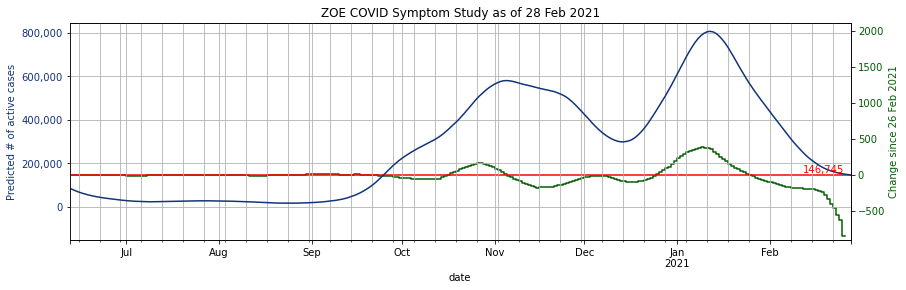

In [54]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

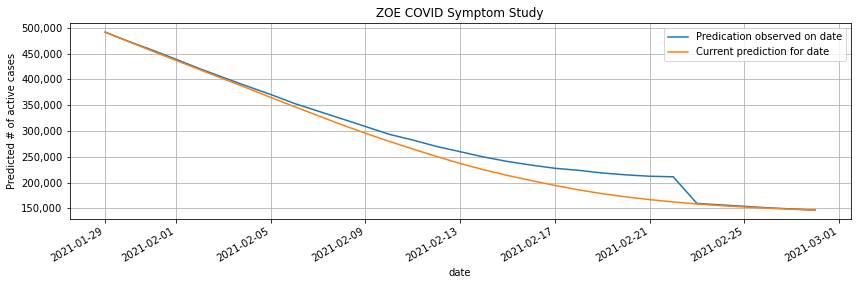

In [55]:
plot_study_evolution(curr_date, days=30)

In [56]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [57]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-02-28_2021-02-28-16-17.pickle


In [58]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
15,"Kingston upon Hull, City of",E06000010,0.972824
300,Bradford,E08000032,0.891032
166,Great Yarmouth,E07000145,0.776811
260,Coventry,E08000026,0.760719
100,Erewash,E07000036,0.738816
295,East Renfrewshire,S12000011,0.736217
45,Bedford,E06000055,0.703580
19,Derby,E06000015,0.676179
189,West Lindsey,E07000142,0.672901
245,Warwick,E07000222,0.659367
